In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape




In [4]:
import numpy as np
import pandas
np.random.seed(10)
print (tf.__version__)

2.18.0


In [5]:
data = pandas.read_csv('colors.csv')
data.head()

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130


In [6]:
len(data)

14157

In [7]:
names=data['name']

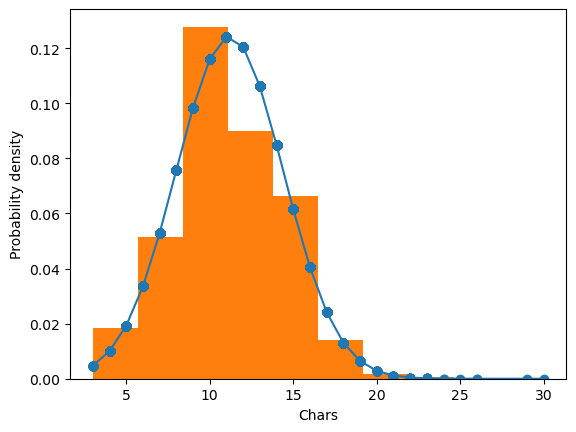

In [8]:
h = sorted(names.str.len().to_numpy())
import numpy as np
import scipy.stats as stats
import pylab as plt

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
plt.plot(h,fit,'-o')
plt.hist(h,density=True)     
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [9]:
np.array(h).max()

30

In [10]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)


In [11]:
from tensorflow.keras.utils import to_categorical 
one_hot_names = to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes


28

In [12]:
one_hot_names.shape

(14157, 25, 28)

In [13]:
t.word_index

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [14]:
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])


In [15]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

C:\Users\asnan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 25, 256)             │         291,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,859 (1.93 MB)

 Trainable params: 505,859 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - acc: 0.6049 - loss: 0.0626 - val_acc: 0.6695 - val_loss: 0.0597
Epoch 2/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 43s 107ms/step - acc: 0.6561 - loss: 0.0561 - val_acc: 0.6758 - val_loss: 0.0556
Epoch 3/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - acc: 0.6593 - loss: 0.0516 - val_acc: 0.6688 - val_loss: 0.0542
Epoch 4/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - acc: 0.6662 - loss: 0.0498 - val_acc: 0.6695 - val_loss: 0.0525
Epoch 5/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - acc: 0.6733 - loss: 0.0476 - val_acc: 0.6857 - val_loss: 0.0497
Epoch 6/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - acc: 0.6787 - loss: 0.0451 - val_acc: 0.6737 - val_loss: 0.0487
Epoch 7/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - acc: 0.6810 - loss: 0.0433 - val_acc: 0.6419 - val_loss: 0.0478
Epoch 8/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step - acc: 0.6683 - loss: 0.0419 - val_acc: 0.7020 - val_loss: 0.0467
Epoch 9/40
399/399 ━━━━━━━━━━━━━━

In [17]:
model.fit(one_hot_names, normalized_values,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 48s 108ms/step - acc: 0.8008 - loss: 0.0117
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step - acc: 0.7995 - loss: 0.0092
Epoch 3/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - acc: 0.8106 - loss: 0.0069
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - acc: 0.8194 - loss: 0.0064
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step - acc: 0.8366 - loss: 0.0060
Epoch 6/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - acc: 0.8417 - loss: 0.0060
Epoch 7/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 43s 98ms/step - acc: 0.8413 - loss: 0.0058
Epoch 8/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - acc: 0.8406 - loss: 0.0060
Epoch 9/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - acc: 0.8427 - loss: 0.0056
Epoch 10/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - acc: 0.8486 - loss: 0.0055


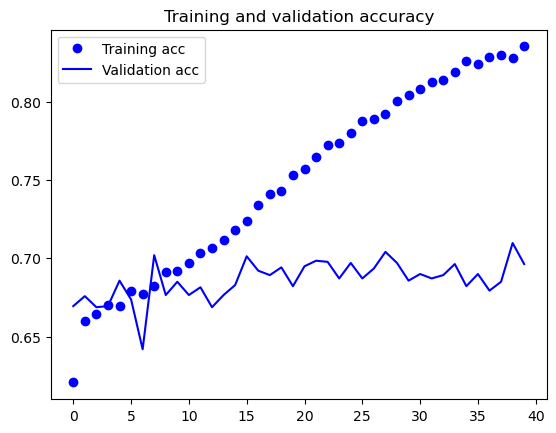

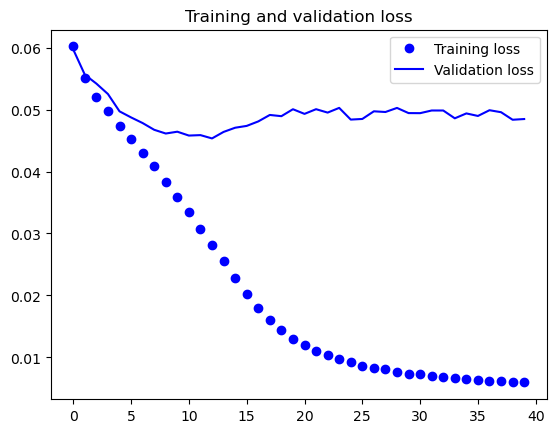

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [20]:
def scale(n):
    return int(n * 255) 


In [23]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = to_categorical(padded, num_classes=num_classes)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
light blue, R,G,B: 166 196 232


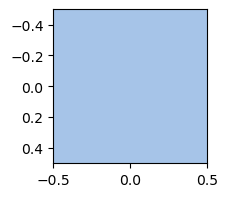

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
blue, R,G,B: 6 49 213


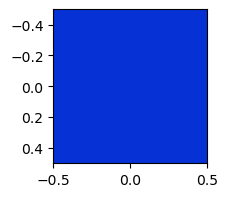

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
dark blue, R,G,B: 10 14 108


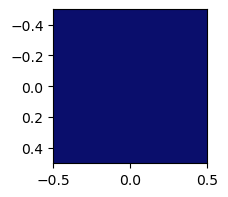

In [24]:
predict("light blue")
predict("blue")
predict("dark blue")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
black, R,G,B: 20 32 27


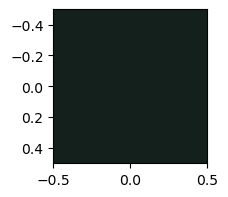

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
white, R,G,B: 244 242 231


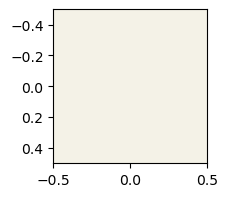

In [25]:
predict("black")
predict("white")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
tensorflow orange, R,G,B: 236 153 97


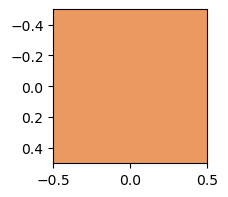

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
forest, R,G,B: 42 90 40


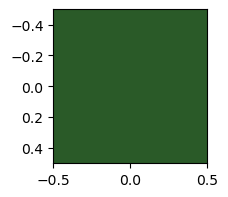

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
evergreen, R,G,B: 31 81 71


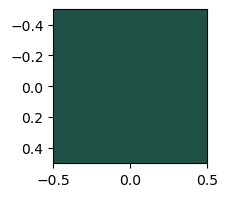

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
tangerine, R,G,B: 249 146 24


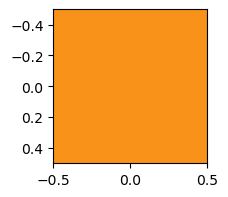

In [26]:
predict("tensorflow orange")
predict("forest")
predict("evergreen")
predict("tangerine")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
princessivory, R,G,B: 244 234 216


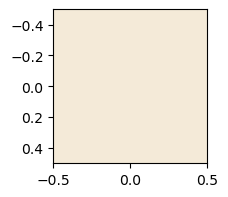

In [27]:
predict("princessivory")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
blue cream, R,G,B: 207 215 201


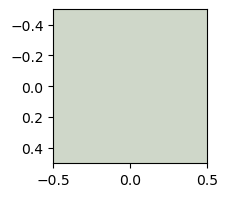

In [28]:
predict("blue cream")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
purple, R,G,B: 112 25 150


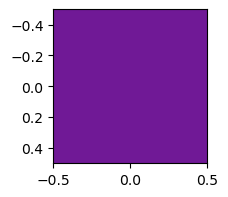

In [29]:
predict("purple")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
keras red, R,G,B: 229 28 57


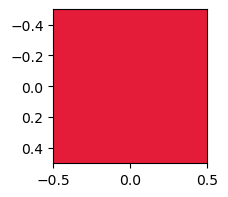

In [30]:
predict("keras red")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
yellowgreen, R,G,B: 198 230 25


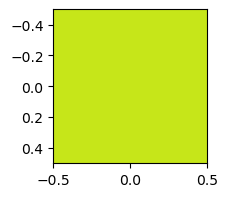

In [31]:
predict("yellowgreen")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
skin, R,G,B: 140 141 120


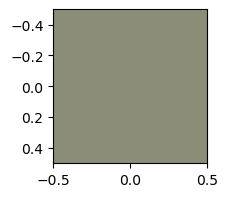

In [32]:
predict("skin")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
dusty pink, R,G,B: 225 154 154


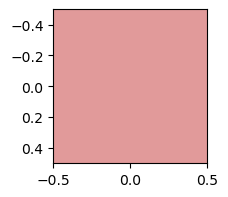

In [33]:
predict("dusty pink")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
darkgreen, R,G,B: 25 55 23


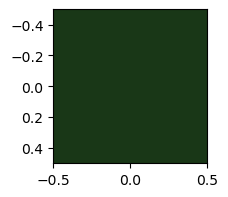

In [38]:
predict("darkgreen")